# Surface Gravity Waves

### Course:  MAR555  &nbsp; &nbsp;&nbsp;        Instructor: Geoff Cowles

**NOTE**:  It is highly recommended that you execute all the cells in the notebook before you begin working with it.  To do this, select *cell => Run All* above. 

Study the notebook and work through the interactive examples.  In some notebooks there are **QUESTIONS** to ponder and optional   **INTERACTIVE EXERCISES** to work through that may require small code modifications.  If you choose to do these and a code change is required, follow these steps:

* Make the code modifications
* Highlight the cell (may already by highlighted)
* Select Run in the menu above to execute the cell with the modified code (or just use hot-key Shift-Enter) 

### Summary

In this notebook we will focus on mathematical solutions of surface gravity waves in the ocean.  In the first part we will review basic wave nomenclature and definitions.  We will then examine Airy's analytical solution to the problem of surface gravity wave propagation which allows us to compute the velocity, pressure field, and celerity associated with surface gravity waves.  After this we will look at two limiting cases of these waves which allow us to greatly simplify Airy's general result.  Finally we will look at some phenomena related specifically to wind-waves.   


In the WaveBasics notebook key wave characteristics including wavelength ($\lambda$), period ($T$), phase velocity ($c$), amplitude ($a$), and height ($H$) were defined.  For the surface gravity wave discussed in this notebook we must introduce a few new parameters (see diagram below).  The restoring force of this class of waves is gravity.  Thus you will see the parameter $g$ used frequently.  $g$ is the gravitational acceleration which at sea level is approximately 9.81 $m/s^2$.  For very rough order-of-magnitude type calculation you may use the approximation $g \approx 10$.  In a surface gravity wave the free surface $\eta$ is a deflection of the air-sea interface from a mean surface level.  The depth of the water $h$ is the distance from the mean sea level to the seafloor.  

![Waves](figures/wave_diagram.png)

### Ocean wave propagation problem

From the 1600s to the mid 1800s there were attempts by a number of mathematicians, scientists, and engineers to come up with a general model for the dynamics of ocean wave propagation.  The list includes efforts by prominent names such as Newton, Lagrange, Poisson, and Cauchy.  Some progress was made by Newton, including a correct understanding of the relationship between wavelength and period and seminal work was completed by Lagrange and others on the tides,  a waveform which resides in a limit where the wavelength is very long compared to the depth.  A general solution was still needed however, in order to include waves that were not long compared to the depth. Given the challenges and significance of the problem, the French Academy of Sciences offered a prize in the early 19th century for advancements.  It was ultimately the effort of George Airy, building on the previous endeavors, that represented the first comprehensive solution.  An excellent account of the history, including both successes and failures can be found in [Craik, A.D.D., 2004.  The origins of water wave theory, Annual Review of Fluid Mechanics 36(1), 1-28](https://www.annualreviews.org/doi/full/10.1146/annurev.fluid.36.050802.122118)

Airy considered monochromatic waves of small amplitude (amplitude small relative to the wavelength, or a << $\lambda$) moving through a homogenous (constant density) fluid of constant depth $h$.   He assumed the fluid to be free of friction (or *inviscid*) and assumed the free surface to be described by the sinusoidal function of the form $\eta(x,t) = a \sin (\omega t - kx)$ with $k$ the wavenumber, $\omega$ the angular frequency, and $a$ the wave amplitude.  This model was examined in detail in the **WaveBasics** notebook. With these assumptions Airy was able to find a solution for the horizontal velocity field $u(x,z,t)$, the vertical velocity field $w(x,z,t)$, and the pressure, $p(x,z,t)$, all as functions of the direction of propagation $x$, vertical coordinate $z$ where $z=0$ is the free surface and $z=-h$ the bottom, and time $t$. His solution for $p,u,w$ are shown below.  Note that the equation for $\eta$ is also included.  The $\eta$ equation is a problem assumption, not an outcome of the solution.  It is included here to ease comparison between them.    

\begin{eqnarray}
p(x,z,t) & = &  \rho a g \frac{\cosh(k(z+h))}{\cosh(kh)} \sin (\omega t - kx)\\
u(x,z,t) & = & a \omega \frac{\cosh(k(z+h))}{\sinh(kh)}\sin (\omega t - kx)\\
w(x,z,t) & = & a \omega \frac{\sinh(k(z+h))}{\sinh(kh)}\cos (\omega t - kx)\\
\eta(x,t) & = &  a \sin (\omega t - kx)
\end{eqnarray}

Here we see that all three terms multiple $\sin$ or $\cos$ functions with same argument as the assumed shape of the wave ($\omega t - kx$).  This argument contains the solution dependency on $x$ and $t$.  They are modulated by the terms in front which contain constants (e.g. $\omega$) and a second term that contains a ratio of two hyperbolic functions that the specifies the dependence of the solution on $z$.  The hyperbolic functions $\sinh,\cosh,$ and $\tanh = \frac{\sinh}{\cosh}$ are shown below. There 

* $\sinh(x) \approx x$ for small $x$
* $\tanh(x) \approx x$ for small $x$
* $\cosh(x) \approx 1$ for small $x$
* $\tanh(x) \approx 1$ for large $x$

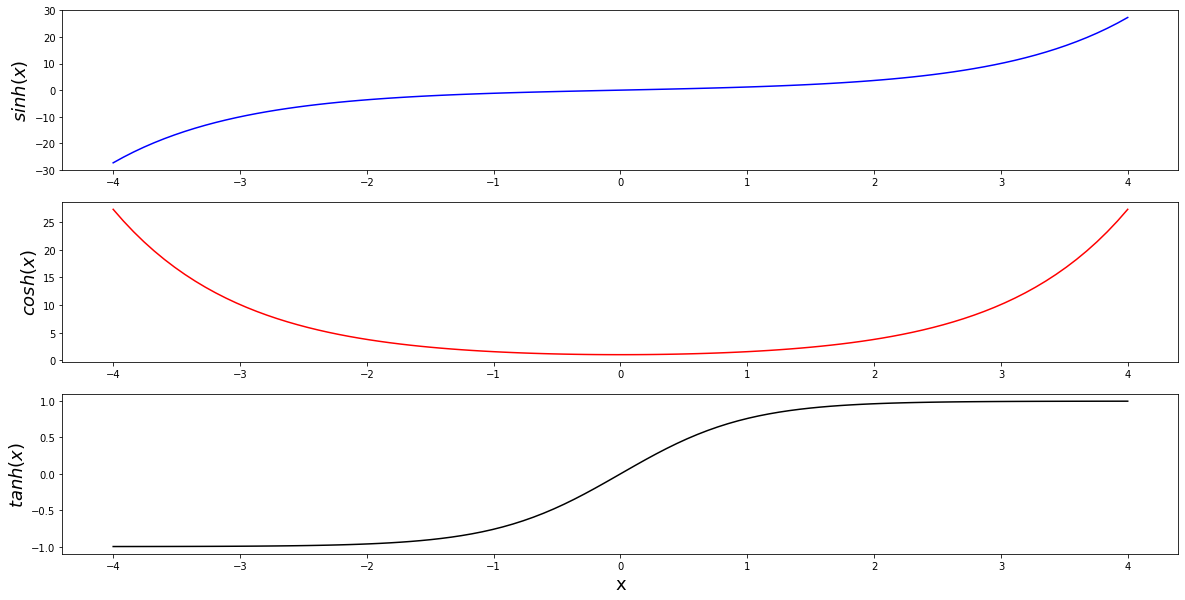

In [56]:
# plot the primary hyperbolic functions over a reasonable interval

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)
fsize = 18

t  = np.linspace(-4,4, num=100)
fsinh  = np.sinh(t)
fcosh  = np.cosh(t)
ftanh  = np.tanh(t)

plt.subplot(311)
plt.plot(t,fsinh,'b')
plt.ylabel("$sinh(x)$",fontsize=fsize)

plt.subplot(312)
plt.plot(t,fcosh,'r')
plt.ylabel("$cosh(x)$",fontsize=fsize)

plt.subplot(313)
plt.plot(t,ftanh,'k')
plt.ylabel("$tanh(x)$",fontsize=fsize)
plt.xlabel("x",fontsize=fsize)

plt.show()       

### Characteristics of the Airy solution

In the next code block the Airy solution is computed and displayed.  You are able to manually advance the wave forward in time and adjust the wavelength of the wave which changes the ratio of wavelength to depth (reported in the lower right).  Please note that as you change wavelength, the $x$ axis bounds change.  Also note that the Airy wave solution is based on a linearized set of equations where the geometry of the free surface is considered flat (as shown in the figure).  However, the pressure field is still influenced by the variation in the free surface.  This is an outcome of the small amplitude assumption ($a << \lambda$) that Airy invoked to obtain his solution. You  should note the following:

* The $x$-velocity ($u$) and pressure ($p$) and free surface height $\eta$ are all in phase.  This would be obvious if you look at the Airy solution above.  The dependence of these variables on $x$ and $t$ is all the same ($\sin(\omega t - kx)$).  
* As the wave moves from left to right, the horizontal velocity induced by the wave ($u$) takes on a maximum value at the wave peak and a minimum (most negative) in the trough.  At the zero crossing of the wave, $u=0$. 
* The $u$ and $w$ fields are 90 degrees out of phase.  This is also evident from the Airy solution as the former depends on $\sin$ and the latter on $\cos$.  Thus, the vertical velocity ($w$) is zero at the peak or trough and is maximum (positive value) on the front face of the wave and minimum (negative) on the back face of the wave.  
* The $u$ and $w$ fields are symmetrical, their negative and positive values have the same magnitude.  The implication of this is that a neutrally buoyant particle in the wave field would experience **NO NET MOTION**.  This is a really important point.  These (inviscid, linearized) waves transfer energy but they DO NOT transfer material.  In reality, true waves have nonlinearities that lead to small but nonzero net transport of material at the surface.  The simplification required for the Airy solution is not able to model those processes. 


**INTERACTIVE EXERCISE**:  Advance the Airy solution in time at the minimum and the maximum wavelength values allowable by the slider bar.  Examine the $u,w,p$ fields and $\eta$ curve and make note of the phase relationships between them.  Make note of whether or note the pressure and velocity fields seem to extend to the bottom or not. 

In [57]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# plot the Airy solution and allow user to change wavelength and time
@interact(t_over_T=(0,1,.125),L=(5,100,1))
# @interact(play = widgets.Play(
# #     interval=10,
#     value=0,
#     min=0,
#     max=100,
#     step=5,
#     description="Press play",
#     disabled=False
# ),L=(5,100,1))

def airy(t_over_T=0,L=5):
    
    import matplotlib.pyplot as plt
    import numpy as np
    plt.rcParams["figure.figsize"] = (20,10)
    
    # plot setup
    fsize = 18
    
    # wave properties
    a = 0.5     #amplitude [m]
    T = 3.      #period [s]
    h = 5.      #depth [m]
    g = 9.81    #gravitational acceleration [m/s^2]
    rho = 1025  #water density [kg/m^3]
    

    # set the grid and compute some useful quantities
    dx, dz = L/25, h/25.
    k = 2*np.pi/L
    omega = 2*np.pi/T
    kh = k*h

    # setup time using Play button variable
    t = t_over_T*T

    # generate 2 2d grids for the x & y bounds
    xi = np.arange(0,L*2,dx)
    z, x = np.meshgrid(np.arange(-h,dz,dz), xi)

    u = a*omega*(np.cosh(k*(z+h))/np.sinh(kh))*np.sin(omega*t-k*x)
    w = a*omega*(np.sinh(k*(z+h))/np.sinh(kh))*np.cos(omega*t-k*x)
    p = a*rho*g*(np.cosh(k*(z+h))/np.cosh(kh))*np.sin(omega*t-k*x)

    eta = a*np.sin(omega*t-k*x)

    # x and y are bounds, so z should be the value *inside* those bounds.
    # Therefore, remove the last value from the z array.
    #u = u[:-1, :-1]
    u_min, u_max = -np.abs(u).max(), np.abs(u).max()
    w_min, w_max = -np.abs(w).max(), np.abs(w).max()
    p_min, p_max = -np.abs(p).max(), np.abs(p).max()
 
   
    plt.subplot(221)
    plt.pcolor(x, z, u, cmap='jet', vmin=u_min, vmax=u_max)
    plt.title('u',fontsize=fsize)
    plt.axis([x.min(), x.max(), z.min(), a])
    #plt.plot(xi,eta,'k')
    plt.colorbar
    
    plt.subplot(222)
    plt.pcolor(x, z, w, cmap='jet', vmin=w_min, vmax=w_max)
    plt.title('w',fontsize=fsize)
    plt.axis([x.min(), x.max(), z.min(), a])
    plt.plot(xi,eta,'k')
    
    plt.subplot(223)
    plt.pcolor(x, z, p, cmap='jet', vmin=p_min, vmax=p_max)
    plt.title('p',fontsize=fsize)
    plt.axis([x.min(), x.max(), z.min(), a])
    plt.plot(xi,eta,'k')
    
    plt.subplot(224)
    plt.axis([x.min(), x.max(), z.min(), a])
    ss = 'h/L = '+"{:.2f}".format(h/L)
    plt.text(0.25*L,-3, ss, fontsize=fsize)
    ss = 'kh = '+"{:.2f}".format(h*k)
    plt.text(0.25*L,-2, ss, fontsize=fsize)
    
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='t_over_T', max=1.0, step=0.125), IntSlider(value=5, …

### Wave-induced Motion

The motion induced by waves can be visualized using time- and depth-dependent velocity vectors as generated in the code block below.  In this interactive demo you can adjust the wavelength of the wave and advance the wave through a period of motion.  The key ratio of depth to wavelength is reported in the demo.  Note how the vertical distribution changes as you adjust the wavelength.  The vector field is describing a kind of *orbital* motion.  When you make the wave very long relative to the depth of the water column, the motion extends all the way to the seafloor.  At the seafloor, the vertical velocity is zero and thus the velocity just moves horizontally, swishing back and forth in phase with the wave.  The orbital motion is also visualized nicely using neutrally-buoyant particles in the short youtube video following the code block. 

In [58]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# interact using an animation widge to advance time and a slider to control wavelength (L)
@interact(play = widgets.Play(
#     interval=10,
    value=25,
    min=0,
    max=100,
    step=5,
    description="Press play",
    disabled=False
),L=(5,100,5))

def orbitals(play,L=5):
    
    import matplotlib.pyplot as plt
    import numpy as np
    plt.rcParams["figure.figsize"] = (20,10)
   
    # wave properties
    a = 0.5  #amplitude [m]
    T = 3.   #period [s]
    h = 5.   #depth [m]
   
    # setup time using Play button variable
    t = .01*play*T
    
    dx, dz = L/3, h/10.
    k = 2*np.pi/L
    omega = 2*np.pi/T
    kh = k*h

    # generate 2d grid for vector field and grid for plotting free surface
    xi = np.arange(-5,5,.1)
    z, x = np.meshgrid(np.arange(-h,dz,dz),-0)

    # velocity field and free surface for reference
    u = a*omega*(np.cosh(k*(z+h))/np.sinh(kh))*np.sin(omega*t-k*x)
    w = a*omega*(np.sinh(k*(z+h))/np.sinh(kh))*np.cos(omega*t-k*x)
    eta = a*np.sin(omega*t-k*xi)
    
    # plot velocity vectors on the graph
    plt.quiver(x,z,u,w,units='xy', scale=1.5, zorder=3, color='blue',
          width=0.03)#, headwidth=2., headlength=1.) 
    
    #set the limits of the plot 
    plt.axis([xi.min(), xi.max(), z.min(), 2*a])
    plt.plot(xi,eta,'r')
    
    # annotate with wave limit
    ss = 'h/L = '+"{:.2f}".format(h/L)
    plt.text(2.5,-0.25*h, ss, fontsize=24)
    ss = 'kh = '+"{:.2f}".format(h*k)
    plt.text(2.5,-0.5*h, ss, fontsize=24)
    
    plt.show()


interactive(children=(Play(value=25, description='Press play', step=5), IntSlider(value=5, description='L', mi…

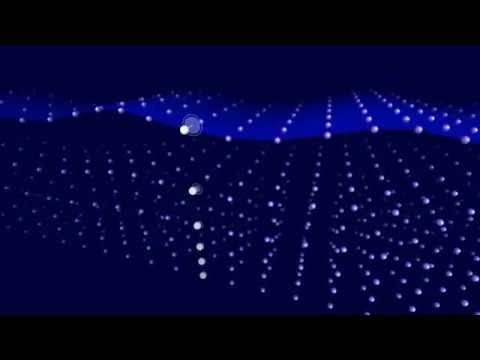

In [59]:
from IPython.display import YouTubeVideo
YouTubeVideo('NShUBfJQEHk', width=800, height=600)

### Dispersion relation

From the Airy solution, a relationship between wave period and wavelength can be derived.  This is usually written in the following form where $\omega=2\pi/T$ is used instead of period and $k=2\pi/\lambda$.  

$\omega^2 = gk \tanh(kh)$

The relationship between wavelength and period is dependent on the depth $h$ and more specifically on the parameter $kh$.  This same parameter shows up in the Airy solutions for $u$,$v$, and $p$ as well.  It is a very important parameter that we need to explore in more detail.  First, let's convert it to more intuitive units.  

$kh = 2\pi \frac{h}{L}$

So, we see character of the dispersion and the Airy wave solution in general is dependent on the ratio of the water depth to the wavelength.  We will explore two limits, one where the depth is greater than the wavelength and another where the depth is much less than the wavelengths in the following sections.  This limits are important because they lead to simplification of the mathematics and affect the dynamics of wave propagation. 

One challenge with the general dispersion relationship is that it is implicit.  Given $\omega$ (or $T$) one cannot directly solve for $k$ (or $\lambda$).  Instead, one would have to solve the roots (solutions) of the nonlinear equation:

$f(k) = gk \tanh(kh) - \omega^2 = 0$

in order to determine $k$.  This can be done using Newton's method or other root finding techniques and is fairly straightforward to solve using Matlab's *fsolve* function or in the browser with Wolfram alfa.   There are also some approximate relationships that allow for direct calculation of $\lambda$ for a given $T$ that are reasonably accurate.  One such relationship developed at the University of Delaware Center for Applied Coastal Research is:

$k = \frac{\omega^2}{g}\tanh \left(\left[ \frac{\omega^2 h}{g} \right]^{3/4}\right)^{-2/3}$

### Wave Celerity

In a previous notebook we defined the phase speed as

$c = \frac{\lambda}{T} = \frac{\omega}{k}$

Using our dispersion relation above we see that for a general wave

$c = \frac{\omega}{k} = \frac{\omega^2}{k \omega} = \frac{g}{\omega}\tanh(kh) = \sqrt{\frac{g}{k}\tanh(kh)} = \sqrt{\frac{g\lambda}{2 \pi} \tanh(\frac{2 \pi h}{\lambda})}$.  

Thus, the phase speed for a general wave is dependent on both the wave characteristics (period, wavelength) and on the depth. Thus, in general, waves are dispersive.  Waves of different wavelengths travel at different speeds.  We will explore the relationship of speed and wavelength in more detail below. 




### Shallow water (Long wave) limit

We will examine what happens as the depth becomes small compared to the wavelength or, equivalently, $kh$ is small.  In this limit $\tanh(kh) \approx kh$ and thus the wave speed $c \approx  \frac{g}{\omega}kh = \frac{gh}{c} \Rightarrow c \approx \sqrt{gh}$.  We find that in this limit, the wavespeed $c$ is *not dependent on wavelength*.  It is ONLY dependent on the depth.  Thus shallow water waves are not dispersive.  Their speed depends only on properties of the medium through which they propagate.  In this case that property is depth ($h$).  These types of waves are referred to as *shallow water* or *long* waves and the difference here is only your perspective.  Remember that $kh = 2 \pi h/L$ so that this $h/L$ is the ratio controlling this parameter.  If the water is *shallow*, the numerator is small and if the wave is *long* the denominator is large.  Either way what is important is not the absolute value of either of thus, rather it is the ratio.  

There is a critical value for this ratio and relates back to the function $\tanh(kh)$ in the dispersion and celerity relationships.  As discussed, when $kh$ tends towards zero, $\tanh(kh)$ tends towards $kh$.  The rule of thumb as to the cutoff for the long wave approximate is $\frac{h}{\lambda} < \frac{1}{20}$.  When the water depth is less than 5 percent of the wavelength, the long wave (shallow water) approximation is suitably accurate and we can use simplified relationships for the wave celerity ($c = \sqrt{gh}$) as well as simplified velocity and pressure fields.  It is important to note this cutoff.  

We have already looked at the implications on celerity.  In this strict limit we also find that the character of the velocity field under the waves change.  The wave orbitals become completely compressed and the motion of the water becomes horizontal.  To see this, return to the animated vector field above and set the wavelength to the largest possible value.  

Wind-waves can act as shallow water waves, particularly when swell with a reasonably long wavelength approaches shallow waters near shore.  However, we don't need shallow water to have the approximation hold true.  Remember, that it is the ratio that matters.  Tide waves have wavelengths of 1000s of km and propagate through water of depth of a few kms.  They can be modeled using the shallow water approximations.  Tsunami waves also qualify (usually).    

**Recap - Shallow water waves**

* Limit criteria:  $\frac{h}{\lambda} < 20$.
* Velocity field induced by the waves influences the bottom (and vice versa).  Later in the semester we will see that this can lead to sediment transport due to waves.  
* Near the bottom the wave orbitals are flattened.  The water simply swashes back and forth with a period equal to that of the wave. 
* Shallow water waves are NOT dispersive.  They travel at a speed set by the depth $c = \sqrt{gh}$.
* Shallow water waves are sometimes referred to as *long waves*
* The Airy solution can be simplified (we refrain from going into detail in this notebook). 

**INTERACTIVE EXERCISES**:  Go to the interactive plot generated by the code block under ### Wave-induced motion. Note that the water column is 5m deep.  Change the wavelength to a value that that will satisfy the shallow water (long wave) approximation and run the simulation through a few periods of motion.  Note the velocity response under the wave.  Is the velocity field prescribing circles or ellipses?  What is the velocity field near the seafloor?  Does the velocity magnitude decay considerably with depth? 

### Deep water (Short wave) limit

If we examine what happens as we increase $kh$ (or increase $\frac{h}{L}$) we find very different behavior. When $h/L$ is very large (or $kh$ is very large): $\tanh(kh) \approx 1$ and $c \approx \frac{g}{\omega} \Rightarrow c = \sqrt{\frac{g}{k}} = \sqrt{ \frac{\lambda g}{2 \pi}}$. 

In this limit, the wave orbitals are circles and decay rapidly with distance from the surface long before the seafloor is reached.  To observe this, return to the animation of the vector field above and set the wavelength to the shortest possible value (5m).  At this point the depth and wavelength are equivalent (make sure you examine the values on the $x$ and $z$ axes to orient yourself). The water depth $h$ is irrelevant.    The wave does not feel the bottom and the bottom does not feel the wave. The depth could double and have no impact on the wave. Thus,$h$ no longer factors into the problem. 

**Recap - Deep water waves**

* Limit criteria:  $\frac{h}{L} > 0.5$.
* Waves have influence into the water column until a depth equal to roughly half the wavelength.  In the deep water limit, the depth is beyond the influence of the wave.
* The wave does not feel the bottom and the bottom does not feel the wave. 
* The wavespeed is given by $c = \sqrt{g\lambda}{2\pi}$.  Speed varies with the square of the wavelength.  
* **Longer waves travel faster than shorter waves**
* Wave orbitals are circular and decay with depth to zero at a point approximately $\lambda/2$ from the free surface. 

**INTERACTIVE EXERCISES**:  Go to the interactive plot generated by the code block under ### Wave-induced motion. Note that the water column is 5m deep.  Change the wavelength to a value that that will satisfy the deep water (short wave) approximation and run the simulation through a few periods of motion.  Note the velocity response under the wave.  Is the velocity field prescribing circles or ellipses?  What is the velocity field near the seafloor?  Does the velocity magnitude decay considerably with depth?  How are your responses to these questions different than they were when you explored this interactive plot with a long wave? 


### Intermediate waves

Waves that are neither shallow (long) nor deep (short) are considered *intermediate* waves.  You must use the general relationship for dispersion and celerity and thus these are dispersive waves.  The period and wavelength are intrinsically tied.  In contrast to deep water waves however, the dispersion is also influenced by the depth.  



**Recap - Intermediate water waves**

* Limit criteria:  $1/20 < \frac{h}{\lambda} < 0.5$.
* Velocity field induced by the waves influences the bottom (and vice versa).  
* Waves are dispersive - the wavelength influences the wave speed
* Water depth also influences wave speed
* The full general Airy solution must be used to describe the velocity and pressure field




### Wave transformations

A given wave does not necessary remain in one classification for its existance.  As wind-waves propagate from deep water to shore they evolve from deep water waves to intermediate waves to shallow water waves.  During this process the speed of propagation diminishes, the wavelength tends shortens, and associated with this, the wave tends to steepen and may eventually break.  The wave celerity diagram in the image below depicts that change in celerity. Note that the wavelength in the diagram is $\Lambda$. Consider for example a 50m wave starting in deep water (far right on the diagram).  As it propagates towards shallow water, you move to the left on the 50m curve.  In deep water the wave speed is fixed (at approximately 10 m/s) since the wavelength is fixed and the depth of water is not relevant.  Once the depth is reduced to half the wavelength ($h = 25 m$), the the wave becomes an intermediate wave (signified by crossing the dashed line in the figure) and begins to feel the bottom.  This causes the wave to change characteristics.  The wave starts to slow down until the depth is such that the shallow water approximation is reached ($h < \lambda/20$) and the wave speed collapses onto the shallow water approximation celerity line ($c = \sqrt{gh}$).  In reality, any shoaling beyond the deep water limit would also induce some changes in the wavelength but a key takeway is that once the wave starts to *feel* the bottom (i.e. once it transitions from deep to intermediate), the wave starts to slow down. 


![Waves](figures/wave_celerity.jpg)

### Refraction

A key implication of wave slowing as they shoal (again, this is due to the dependence of speed on water depth) is a phenomena called *refraction*.  Just as prisms perform wavelength-selective bending of light (causing colors to split), straight wave crests approaching shore at an oblique angle will also bend.  This is best explained in the youtube video below which features some excellent graphics. 


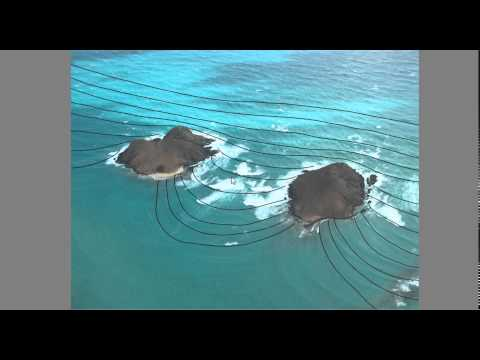

In [60]:
from IPython.display import YouTubeVideo
YouTubeVideo('E9UJjdlTQQI', width=800, height=600)

### Longshore sediment tranport 

Refraction causes wave crests to become more, but not necessarily perfectly, parallel to shore.  There is thus some net influence in the along shore direction of the waves on the bottom in the shallow region near shore and in the swash zone.  This gives rise to a wave-driven net sediment transport along the shore.  In many regions this net transport plays a critical role in sustaining or building barrier beaches.  The transport direction and strength may vary over the year as seasonal winds might drive seasonal differences in wave size and direction.  Alongshore drift is nicely explained in the following video (5 minutes). 

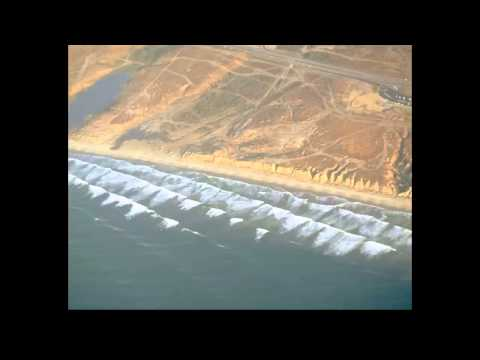

In [61]:
from IPython.display import YouTubeVideo
YouTubeVideo('05EQLQqKMGU', width=800, height=600)